Presentation:<https://docs.google.com/presentation/d/1LEzW1ufEjACGxjvvCJHI9O3r1M0W3Q9qh-prBqR_V8U/edit?usp=sharing>
<a id="6"><a/>

# Title:
# Market research

## Project description:
You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
Your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

#### Navigation through the course of the study:
1. [Load libraries](#1)
2. [Opening data](#2)
3. [Preprocessing the data](#3)
4. [Data Analysis](#4)
>* 4.1 [Investigate the proportions of the various types of establishments?](#4.1)
>* 4.2 [Investigate the proportions of chain and nonchain establishments?](#4.2)
>* 4.3 [Which type of establishment is typically a chain?](#4.3)
>* 4.4 [Determine the average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats?](#4.4)
>* 4.5 [Put the data on street names from the address column in a separate column](#4.5)
>* 4.6 [Plot a graph of the top ten streets by number of restaurants.](#4.6)
>* 4.7 [Find the number of streets that only have one restaurant.](#4.7)
>* 4.8 [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#4.8)
5. [Conclusions & recommendations](#5)
6. [Presentation slides](#6)

### Load and take a first look at the data.
<a id="1"></a>

In [1]:
#!pip install usaddress
import pandas as pd
import usaddress
import re
from pandas.io.json import json_normalize
import json
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")
from numpy import median
import matplotlib.pyplot as plt

### Opening data
<a id="2"></a>

In [403]:
try:
    df=pd.read_csv('/datasets/rest_data_us.csv',dtype={'object_name':'category','address':'category',\
                                         'chain':'category','object_type':'category','id':'int32','number':'int32'}) 
except:
    df=pd.read_csv('rest_data_us.csv',dtype={'object_name':'category','address':'category',\
                                         'chain':'category','object_type':'category','id':'int32','number':'int32'}) 

In [404]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,FALSE,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,FALSE,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,FALSE,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,FALSE,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,FALSE,Restaurant,20


In [405]:
df['chain'].unique()

[FALSE, TRUE, NaN]
Categories (2, object): [FALSE, TRUE]

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int32
object_name    9651 non-null category
address        9651 non-null category
chain          9648 non-null category
object_type    9651 non-null category
number         9651 non-null int32
dtypes: category(4), int32(2)
memory usage: 906.5 KB


In [407]:
df.describe(include='all')

,id,object_name,address,chain,object_type,number
count,9651.000000,9651,9651,9648,9651,9651.000000
unique,NaN,8672,8517,2,6,NaN
top,NaN,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,FALSE,Restaurant,NaN
freq,NaN,47,11,5972,7255,NaN
mean,16611.000000,NaN,NaN,NaN,NaN,43.695161
std,2786.148058,NaN,NaN,NaN,NaN,47.622874
min,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,14198.500000,NaN,NaN,NaN,NaN,14.000000
50%,16611.000000,NaN,NaN,NaN,NaN,27.000000
75%,19023.500000,NaN,NaN,NaN,NaN,46.000000


* The top class of establishment is the Restaurant businesses while the most frequent street is Trousdale PKWY.We have to clean the addresses from the numbers and check again after if this street remains the most popular. The most frequent firma of the establishments seems to be the THE COFFEE BEAN & TEA LEAF

### Preprocessing the data
<a id="3"></a>

In [408]:
#check for missing values
df.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [409]:
df[df['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [410]:
df['chain'].value_counts()

FALSE    5972
TRUE     3676
Name: chain, dtype: int64

In [420]:
df.head(3)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,FALSE,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,FALSE,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,FALSE,Fast Food,20


In [418]:
# Replace the nan in the chain column

df['chain'].loc[df['chain'].isnull()] =df[df['chain'].isnull()]\
                                       .apply(lambda x: 'TRUE' if x['number']>1 else 'FALSE' ,axis=1)

#check the nans
display(df.isnull().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [419]:
# Confirm that the replace of the nan was correct
df['chain'].value_counts()

FALSE    5973
TRUE     3678
Name: chain, dtype: int64

In [421]:
#check for duplicates
display(df.duplicated().sum())

#check for dublicated id
display(df['id'].duplicated().sum())

0

0

### Data Analysis 
<a id="4"></a>

* Parse the address and split the numbers to investigate if a chain has more than one restaurants in the same street 
or check how many restaraunts are in each street

In [422]:
#Create a dictionary with the parsed values of the addresses 
singe_address=usaddress.parse(df['address'][1])

street_dict={}
for i in singe_address:
    if i[1] not in street_dict.keys():       
        street_dict.update({i[1]:i[0]})
    elif i[1]==str:
        street_dict[i[1]]+=' '+i[0]
    else:
        street_dict[i[1]]+=' '+ str(i[0])
    
street_dict
if 'StreetName' in street_dict.keys():
    name=street_dict['StreetName']
else:
    'incorrect address'
name

'WORLD'

In [423]:
#Define a function for parsing the address and get the street name or other 
def get_street(raw_address):
    #Create a dictionary from each address
    raw_list=usaddress.parse(raw_address)
    raw_dict={}
    for i in raw_list:
        if i[1] and i[1] not in raw_dict.keys():       
            raw_dict.update({i[1]:i[0]})
        elif i[1]==str:
            raw_dict[i[1]]+=' '+i[0]
        else:
            raw_dict[i[1]]+=' '+ str(i[0])

    #Get the street name from the dictionary if there is
    if 'StreetName' in raw_dict.keys():
        name=raw_dict['StreetName']
    else:
        name='incorrect address'
    return name

In [424]:
df['street_name']=df['address'].apply(get_street)

In [425]:
df['street_name'].head()

0    EAGLE ROCK
1         WORLD
2     HOLLYWOOD
3        SUNSET
4     ECHO PARK
Name: street_name, dtype: object

In [426]:
df.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,FALSE,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,FALSE,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,FALSE,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,FALSE,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,FALSE,Restaurant,20,ECHO PARK


## Questions
### Investigate the proportions of the various types of establishments. 
<a id="4.1"></a>

In [427]:
print('Percentage distribution of each type:\n', df['object_type'].value_counts(normalize=True))

Percentage distribution of each type:
 Restaurant    0.751736
Fast Food     0.110455
Cafe          0.045073
Pizza         0.033157
Bar           0.030256
Bakery        0.029323
Name: object_type, dtype: float64


In [428]:
bar=pd.DataFrame(df['object_type'].value_counts())
bar['total_number']=bar['object_type']
bar['object_type']=bar.index
bar.reset_index(drop=True)

,object_type,total_number
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [429]:
#bar=pd.DataFrame(df['object_type'].value_counts())
fig=px.bar(bar,x='object_type',y='total_number',color='object_type',title='Establishments distribution',\
           labels={'x':'Type of establishment','y':'Total number'})
fig.show()

Restaurants occupied the 75% of the market following the Fast food type of establishment with 11%, cafe with 4,5% and so on.

### Investigate the proportions of chain and nonchain establishments.
<a id="4.2"></a>

In [430]:
df[df['chain']=='TRUE']['object_name'].value_counts()

THE COFFEE BEAN & TEA LEAF      47
SUBWAY                          31
DOMINO'S PIZZA                  15
KENTUCKY FRIED CHICKEN          14
WABA GRILL                      14
TRIMANA                         13
MCDONALD'S                      13
PAPA JOHN'S PIZZA               12
STARBUCKS                       12
HONG KONG EXPRESS               12
YOGURTLAND                      12
SUBWAY SANDWICHES               11
CHIPOTLE MEXICAN GRILL          10
LOUISIANA FRIED CHICKEN         10
EL POLLO LOCO                   10
WINGSTOP                        10
BLUE BOTTLE COFFEE               9
KFC                              9
JERSEY MIKE'S SUBS               8
CARL'S JR                        8
BASKIN ROBBINS                   8
CHINA EXPRESS                    7
PINKBERRY                        7
WHOLE FOODS MARKET               6
CHINATOWN EXPRESS                6
WETZEL'S PRETZELS                6
PANDA EXPRESS                    6
LITTLE CAESARS                   6
TACO BELL           

* Considering that many establishments are recorded as chains but the count of them equals to 1 we assuming that the object name is been stored with a different-similar name that we have to take a look and correct the name entries.
We can observe some of them above like the PAPA JOHN'S  PIZZA,PAO JAO,PAPA JAKE'S SUB SHOP.
* Checking the order from the top with the establishments with the most shops we see the firma SUBWAY and SUBWAY SANDWICHES that after a short research there is no establishment with the name SUBWAY SANDWICHES in Los Angeles.Only SUBWAY.

In [431]:
df['object_name'].replace('SUBWAY SANDWICHES','SUBWAY',inplace=True)
df['object_name'].replace('PAO JAO DUMPLING HOUSE LA ','PAO JAO',inplace=True)
df['object_name'].replace("PAPA JAKE'S SUB SHOP PREP KITCHEN","PAPA JAKE'S",inplace=True)

* We see many corrupted entries also with the BIG MAMAS & PAPAS PIZZERIA and PAPA JAKE'S.

In [432]:
#replace the all the similar names of 'PAPA JOHN' with "PAPA JOHN'S PIZZA"
df.loc[df['object_name'].str.contains('PAPA JOHN'),'object_name']="PAPA JOHN'S PIZZA"
df.loc[df['object_name'].str.contains('BIG MAMA'),'object_name']="BIG MAMA'S"
df.loc[df['object_name'].str.contains("PAPA JAKE'S"),'object_name']="PAPA JAKE'S"

In [433]:
df[df['object_name'].str.contains("PAPA JAKE'S")]

,id,object_name,address,chain,object_type,number,street_name
3361,15147,PAPA JAKE'S,6333 W 3RD ST # 510,FALSE,Restaurant,10,3RD
3379,15165,PAPA JAKE'S,6333 W 3RD ST # EK10,TRUE,Restaurant,9,3RD


In [434]:
#Top 20 of the establishments with the most shops
df[df['chain']=='TRUE']['object_name'].value_counts()[:20]

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        42
PAPA JOHN'S PIZZA             16
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
TRIMANA                       13
MCDONALD'S                    13
YOGURTLAND                    12
STARBUCKS                     12
HONG KONG EXPRESS             12
WINGSTOP                      10
LOUISIANA FRIED CHICKEN       10
CHIPOTLE MEXICAN GRILL        10
EL POLLO LOCO                 10
KFC                            9
BLUE BOTTLE COFFEE             9
CARL'S JR                      8
JERSEY MIKE'S SUBS             8
BASKIN ROBBINS                 8
Name: object_name, dtype: int64

We see BIG MAMA'S chain climbed to the 20st rank place, after correcting the names.

In [435]:
#proportions of chain and no-chain establishments
print('The {:.2%} of the market in Los Angeles is formed by chain establishments.'\
      .format(df[df['chain']=='TRUE'].shape[0]/df.shape[0]))

print('The {:.2%} of the market in Los Angeles is formed by no-chain establishments.'\
      .format(df[df['chain']=='FALSE'].shape[0]/df.shape[0]))

The 38.11% of the market in Los Angeles is formed by chain establishments.
The 61.89% of the market in Los Angeles is formed by no-chain establishments.


In [436]:
chain=pd.DataFrame(df['chain'].value_counts())
chain.rename(columns={'chain':'total'},inplace=True)
chain['type_chain']=chain.index
chain=chain.reset_index(drop=True)
chain

,total,type_chain
0,5973,FALSE
1,3678,TRUE


In [437]:
fig=px.bar(chain,x='type_chain',y='total',color='type_chain',title='Chain & no-chain establishments',\
           labels={'x':'No-chain & chain','y':'count'})
fig.show()

In [438]:
#Top 10 numerous in store chain establishments in % of the total number of establishment in LA
round((df[df['chain']=='TRUE']['object_name'].value_counts()[:10]/df.shape[0])*100,2)

THE COFFEE BEAN & TEA LEAF    0.49
SUBWAY                        0.44
PAPA JOHN'S PIZZA             0.17
DOMINO'S PIZZA                0.16
WABA GRILL                    0.15
KENTUCKY FRIED CHICKEN        0.15
TRIMANA                       0.13
MCDONALD'S                    0.13
YOGURTLAND                    0.12
STARBUCKS                     0.12
Name: object_name, dtype: float64

### Which type of establishment is typically a chain?
<a id="4.3"><a/>

In [439]:
df[df['chain']=='TRUE']['object_type'].value_counts()

Restaurant    2294
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64

* A chain store or retail chain is a retail outlet in which several locations share a brand, central management, and standardized business practices.
- Here the main 3 types that dominate the market are Restaurant,Fast Food and Bakery

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [440]:
df.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,FALSE,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,FALSE,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,FALSE,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,FALSE,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,FALSE,Restaurant,20,ECHO PARK


In [441]:
#top 20 in number of chain-stores per Brand
display(df[df['chain']=='TRUE']['object_name'].value_counts()[:20])
top20_name= list(df[df['chain']=='TRUE']['object_name'].value_counts()[:20].index)
display(top20_name)

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        42
PAPA JOHN'S PIZZA             16
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
TRIMANA                       13
MCDONALD'S                    13
YOGURTLAND                    12
STARBUCKS                     12
HONG KONG EXPRESS             12
WINGSTOP                      10
LOUISIANA FRIED CHICKEN       10
CHIPOTLE MEXICAN GRILL        10
EL POLLO LOCO                 10
KFC                            9
BLUE BOTTLE COFFEE             9
CARL'S JR                      8
JERSEY MIKE'S SUBS             8
BASKIN ROBBINS                 8
Name: object_name, dtype: int64

['THE COFFEE BEAN & TEA LEAF',
 'SUBWAY',
 "PAPA JOHN'S PIZZA",
 "DOMINO'S PIZZA",
 'WABA GRILL',
 'KENTUCKY FRIED CHICKEN',
 'TRIMANA',
 "MCDONALD'S",
 'YOGURTLAND',
 'STARBUCKS',
 'HONG KONG EXPRESS',
 'WINGSTOP',
 'LOUISIANA FRIED CHICKEN',
 'CHIPOTLE MEXICAN GRILL',
 'EL POLLO LOCO',
 'KFC',
 'BLUE BOTTLE COFFEE',
 "CARL'S JR",
 "JERSEY MIKE'S SUBS",
 'BASKIN ROBBINS']

In [442]:
#Top 20 most popular streets with the most chain-stores
df[df['chain']=='TRUE']['street_name'].value_counts()[:20]

WILSHIRE        155
FIGUEROA        147
WESTERN         144
SUNSET          142
PICO            123
OLYMPIC         115
VERMONT         113
SANTA MONICA    105
3RD              95
BROADWAY         88
HOLLYWOOD        85
6TH              79
BEVERLY          75
WORLD            62
WHITTIER         62
CENTRAL          60
WESTWOOD         50
VENICE           46
7TH              45
COLORADO         44
Name: street_name, dtype: int64

* It would be nice to have here info about the rent price/sq.m to check if there is a relationship between the demand(the number of stores in a street) and the cost of rent

In [443]:
top20_street= list(df[df['chain']=='TRUE']['street_name'].value_counts()[:20].index)
top20_street[:3]

['WILSHIRE', 'FIGUEROA', 'WESTERN']

In [487]:
#Further name corrections and chain-classified to be done here with YOGURT LAND,YOSHINOYA, WETZELS PRETZELS, WINGSTOP
df['object_name'].replace('YOGURT LAND','YOGURTLAND',inplace=True)
df['object_name'].replace('A WON JAPANASE RESTAURANT','A WON JAPANESE RESTAURANT',inplace=True)
df.loc[df['object_name'].str.contains('YOSHINOYA'),'object_name']='YOSHINOYA'
df.loc[df['object_name']=='YOSHINOYA','chain']='TRUE'
df.loc[df['object_name'].str.contains('WETZELS'),'object_name']='WETZELS PRETZELS'
df.loc[df['object_name'].str.contains('WINGSTOP'),'object_name']='WINGSTOP'
df.loc[df['object_name']=='WINGSTOP','chain']='TRUE'


In [490]:
#Companies in the 20 most crowded streets with stores, and the number of stores per company in those streets
df[(df['chain']=='TRUE') & (df['street_name'].isin(top20_street))]\
   .groupby('object_name',as_index=False).agg({'street_name':'unique','number':'sum'})[:10]

,object_name,street_name,number
0,#1 CHINESE FAST FOOD,[VERMONT],6
1,3RD ST MARKET & DELI,[3RD],7
2,4 CAMINOS RESTAURANT,[6TH],18
3,5 LINE RESTAURANT,[COLORADO],41
4,85 C BAKERY CAFE,[WILSHIRE],45
5,85 CELSIUS BAKERY CAFE,[WILSHIRE],37
6,A WON JAPANESE RESTAURANT,[VERMONT],202
7,A-1 BBQ AND FOOD TO GO,[SUNSET],3
8,ABC CHINESE FOOD,[7TH],13
9,ABC DONUTS,[3RD],21


In [481]:
#Companies in the 20 most crowded streets with stores, and the number of stores per company in those streets
df[(df['chain']=='TRUE') & (df['street_name'].isin(top20_street))]\
   .groupby('object_name',as_index=False).agg({'street_name':'count','number':'mean'})[:10]

,object_name,street_name,number
0,#1 CHINESE FAST FOOD,1,6.0
1,3RD ST MARKET & DELI,1,7.0
2,4 CAMINOS RESTAURANT,1,18.0
3,5 LINE RESTAURANT,1,41.0
4,85 C BAKERY CAFE,1,45.0
5,85 CELSIUS BAKERY CAFE,1,37.0
6,A WON JAPANASE RESTAURANT,1,105.0
7,A WON JAPANESE RESTAURANT,1,97.0
8,A-1 BBQ AND FOOD TO GO,1,3.0
9,ABC CHINESE FOOD,1,13.0


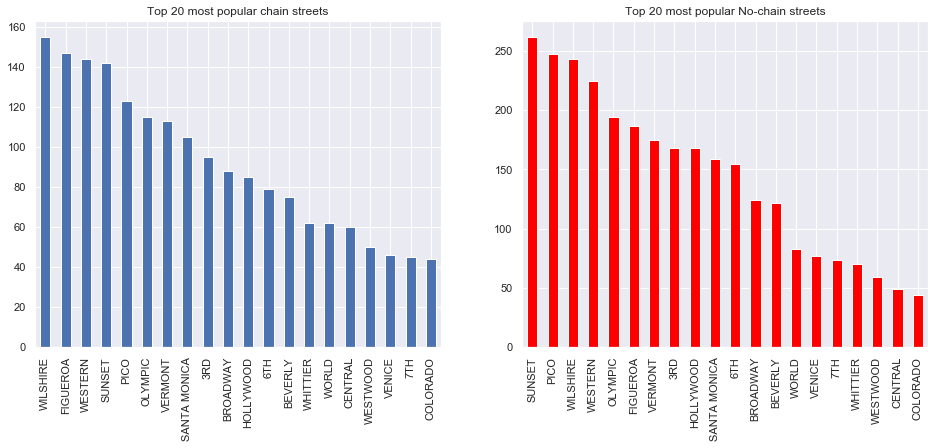

In [446]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
df[(df['chain']=='TRUE') & (df['street_name'].isin(top20_street))]['street_name'].value_counts()\
.plot(kind='bar',ax=axes[0])
axes[0].set_title('Top 20 most popular chain streets')
df[(df['chain']=='FALSE') & (df['street_name'].isin(top20_street))]['street_name'].value_counts()\
.plot(kind='bar',ax=axes[1],color='red')
axes[1].set_title('Top 20 most popular No-chain streets')

plt.show()

* We see small differences in the ranking of the streets between the chain and the no-chain stores.
* Some of them look like to be more interesting for chain-stores like Sunset street which has the 1st rank position for no-chain establishments but for chain-establishments drops to 4th position.
* Also for the Pico street is happening something similar with having the 5th postition in the ranking of popularity for the chain-stores while for the no-chain stores holds the 2nd position.

In [447]:
fig=px.histogram(df,x='number',color='chain',title='Chain vs No-chain seats',labels={'number':'Number of seats'})
fig.show()

* It doesn't look to be any clear difference in the preferable number of seats for the chain and no-chain establishments, besides a small difference in the top spike of each one where for the chains the number of seat is 10-14 while for the no-chain stores is 5-9.

In [448]:
#The top 20 chain-brands(with the most stores) in the top 20 streets(streets with the most chain-stores), average 
#number of seats and 
top20_seat_stores=df[(df['chain']=='TRUE') & (df['street_name'].isin(top20_street)) & (df['object_name'].isin(top20_name))]\
   .groupby('object_name',as_index=False).agg({'street_name':'count','number':'mean'})\
   .rename(columns={'object_name':'chain_name','street_name':'number_of_stores','number':'seats'})\
   .sort_values('number_of_stores',ascending=False).reset_index(drop=True)
top20_seat_stores

,chain_name,number_of_stores,seats
0,THE COFFEE BEAN & TEA LEAF,32,26.718750
1,SUBWAY,24,17.000000
2,YOGURTLAND,10,18.600000
3,WINGSTOP,10,26.000000
4,DOMINO'S PIZZA,9,11.111111
5,WABA GRILL,9,45.333333
6,KENTUCKY FRIED CHICKEN,7,35.857143
7,PAPA JOHN'S PIZZA,7,14.571429
8,JERSEY MIKE'S SUBS,6,25.166667
9,KFC,6,46.333333


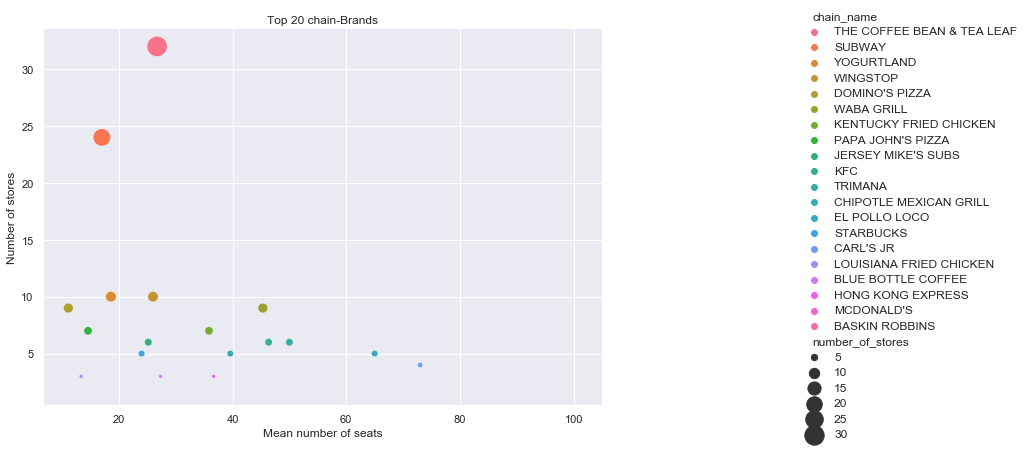

In [449]:
#Plot the number of stores vs mean number of seats of the top 20 chain-Brands in stores
g=sns.relplot(x='seats',y='number_of_stores',hue='chain_name',sizes=(0,400),\
              size='number_of_stores',data=top20_seat_stores)
g.fig.set_size_inches(15,6)
g.set(xlabel='Mean number of seats',ylabel='Number of stores')
plt.title('Top 20 chain-Brands')
#plt.savefig(my_path+'/Top_20_chain-Brands.png',dpi=300,bbox_inches="tight")
plt.show()

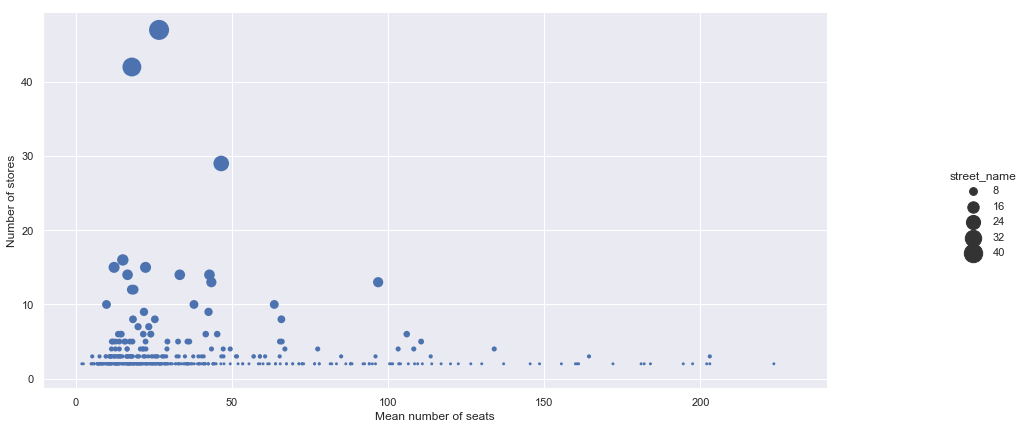

In [450]:
stores_seats=df[df['chain']=='TRUE'].groupby('object_name',as_index=False)\
.agg({'street_name':'count','number':'mean'})

g=sns.relplot(x='number',y='street_name',sizes=(0,400),size='street_name',data=stores_seats)
g.fig.set_size_inches(15,6)
g.set(xlabel='Mean number of seats',ylabel='Number of stores')
plt.show()

* We see that the pattern remains the same for the top-20 in stores Brands, with the overall relationship between the number of the stores and the mean number of seats for each Brand.
* Companies with more stores tend to have mostly less seats while firmas with less stores tend to have bigger number of seats

### Determine the average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats? 
<a id="4.4"><a/>

In [451]:
seats_per_object=df[df['chain']=='TRUE'].groupby('object_type',as_index=False)['number'].mean()\
.sort_values('number',ascending=False)
seats_per_object

,object_type,number
5,Restaurant,44.838274
1,Bar,40.259740
3,Fast Food,38.089256
2,Cafe,25.917293
4,Pizza,25.529412
0,Bakery,21.773852


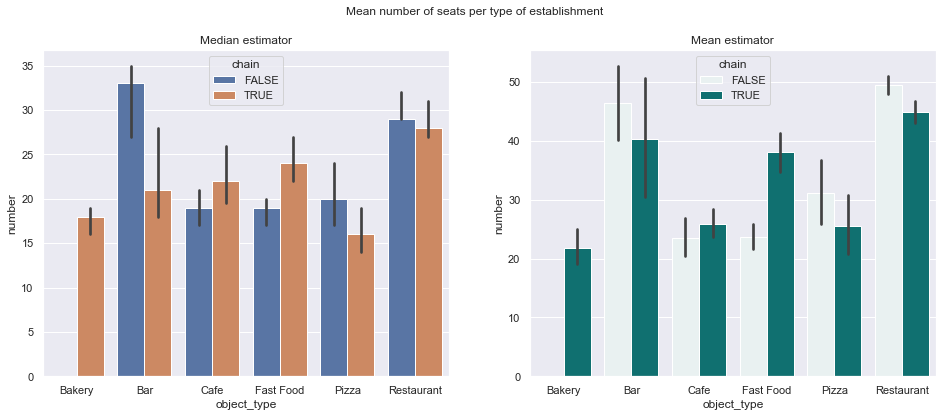

In [452]:
#Mean number of seats per type of establishment
fig,axe=plt.subplots(1,2,figsize=(16,6))
sns.barplot(data=df,x='object_type',y='number',hue='chain',estimator=median,ax=axe[0])
sns.barplot(data=df,x='object_type',y='number',hue='chain',color='teal',ax=axe[1])
axe[0].set_title('Median estimator')
axe[1].set_title('Mean estimator')
fig.suptitle('Mean number of seats per type of establishment')
#plt.savefig(my_path+'/Seats_per_type_of_establishment.png',dpi=300,bbox_inches="tight")
plt.show()

- In overall restaurants have the higher number of seats.
- We see here more clear that bakeries,bars,fast food and restaraunts tend to have higher number of seats when comes for a no-chain establishment while the opposite happens for the chains.
- The opposite happens only for the pizza shops and slightly for the cafes.
- We see that the pattern changes for the bakeries and make more noticable for the cafes if we choose as for estimator the median.That means there were some outliers hense some no-chain cafes have a higher number of seats comparing the rest no-chain cafes.And so the same for the bakeries

### Put the data on street names from the address column in a separate column.
<a id="4.5"><a/>

In [453]:
df.head(2)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,FALSE,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,FALSE,Restaurant,9,WORLD


### Plot a graph of the top ten streets by number of restaurants.
<a id="4.6"><a/>

In [454]:
top10_in_stores.head()

,street_name,number_restaurants
0,SUNSET,404
1,WILSHIRE,398
2,PICO,370
3,WESTERN,369
4,FIGUEROA,334


,street_name,number_restaurants
0,SUNSET,404
1,WILSHIRE,398
2,PICO,370
3,WESTERN,369
4,FIGUEROA,334
5,OLYMPIC,309
6,VERMONT,288
7,SANTA MONICA,264
8,3RD,263
9,HOLLYWOOD,253


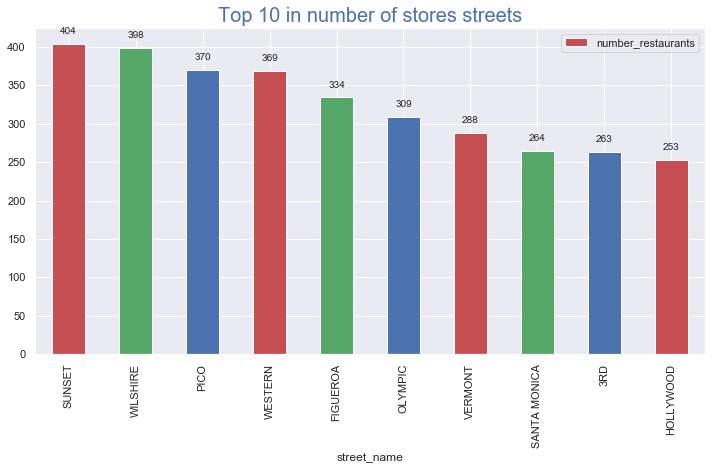

In [457]:
top10_in_stores=df.groupby('street_name',as_index=False).agg({'object_type':'count'})\
.sort_values('object_type',ascending=False).rename(columns={'object_type':'number_restaurants'})[:10]\
.reset_index(drop=True)
display(top10_in_stores)


top10_in_stores.plot(kind='bar',x='street_name',figsize=(12,6),color='RGB')
plt.title('Top 10 in number of stores streets',Fontsize = 20, color ='b')


# zip joins x and y coordinates in pairs
for x,y in zip(top10_in_stores['street_name'].index, top10_in_stores['number_restaurants']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label,need both x,y be numerical
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [458]:
top10_in_restaurants=df.groupby('street_name',as_index=False).agg({'object_type':'count'})\
.sort_values('object_type',ascending=False)[:10]['street_name']
top10_in_restaurants

423          SUNSET
473        WILSHIRE
363            PICO
463         WESTERN
181        FIGUEROA
345         OLYMPIC
447         VERMONT
393    SANTA MONICA
25              3RD
227       HOLLYWOOD
Name: street_name, dtype: object

In [459]:
#Define a function to plot the number of establishments per category
def plot_count_categories(data_,title):
    w=sns.catplot(data=data_,x='street_name',hue='object_type',col='chain',kind='count')
    w.fig.set_size_inches(16,6)
    w.set_xticklabels(rotation=30)
    w.fig.subplots_adjust(top=0.9)
    w.fig.suptitle(title,fontsize=20,color='b')
    plt.show()    

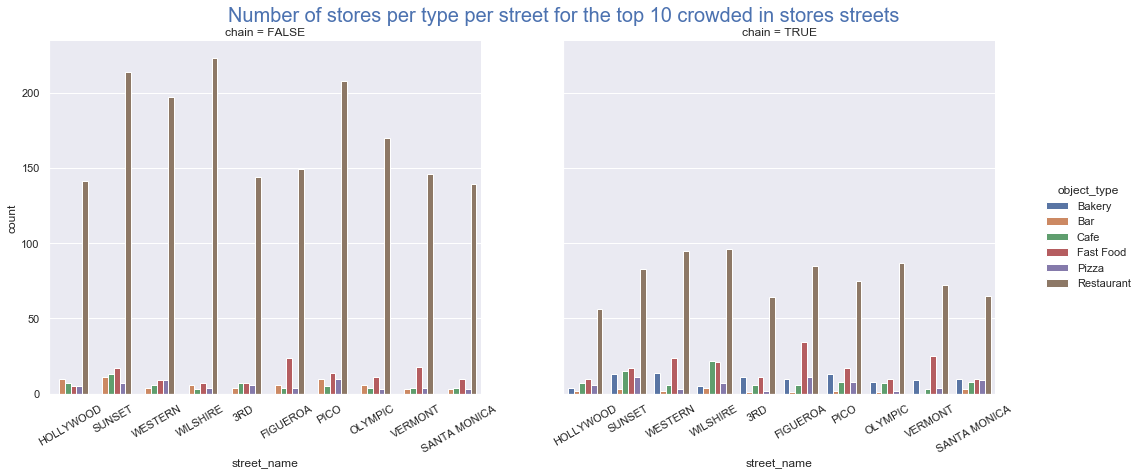

In [460]:
#plot of types
plot_data = df[df['street_name'].isin(top10_in_stores['street_name'])]
title ='Number of stores per type per street for the top 10 crowded in stores streets'

plot_count_categories(plot_data,title)

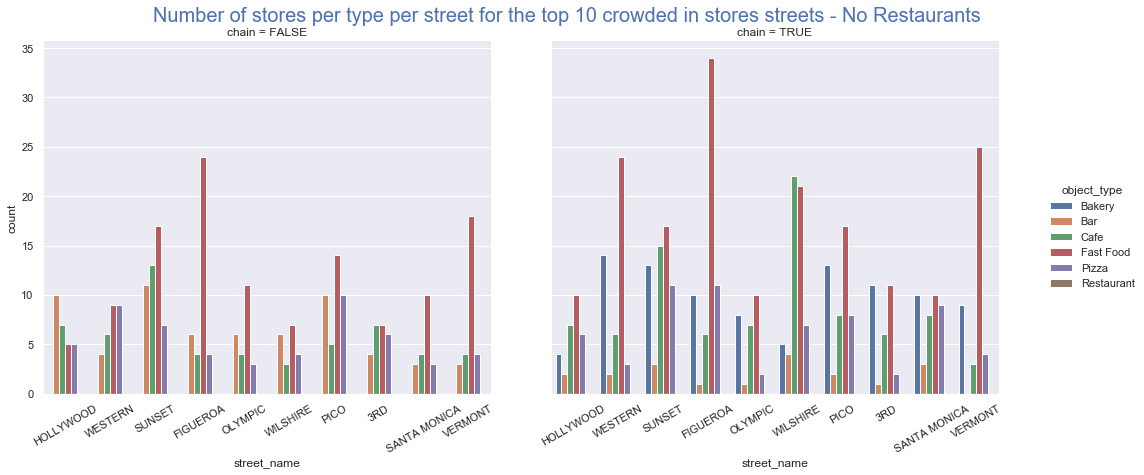

In [463]:
#plot all types besides restaurants
plot_data = data=df[(df['street_name'].isin(top10_in_stores['street_name'])) & (df['object_type']!='Restaurant')]
title ='Number of stores per type per street for the top 10 crowded in stores streets - No Restaurants'

plot_count_categories(plot_data,title)

* Sunset street has the most no-chain cafes while Wilshire has the most chain cafes
* We see no at all chain cafes in Vermont neither chain bars. The fact that there are many fast food establishments maybe indicates Vermont is a central road with noticable flow of people.

### Find the number of streets that only have one restaurant.
<A id="4.7"><a/>

In [464]:
number_establishments=df.groupby('street_name',as_index=False).agg({'object_type':'count'})
only_1_establishment=number_establishments[number_establishments['object_type']==1]
print('{} streets with only 1 establishment'.format(only_1_establishment.shape[0]))

202 streets with only 1 establishment


In [465]:
number_establishments=df[df['object_type']=='Restaurant'].groupby('street_name',as_index=False)\
.agg({'object_type':'count'})
only_1_restaurant=number_establishments[number_establishments['object_type']==1]
print('{} streets with only 1 restaurant'.format(only_1_restaurant.shape[0]))

201 streets with only 1 restaurant


### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
<a id="4.8"><a/>

In [466]:
top_streets_general=list(df['street_name'].value_counts()[:10].index)
fig=px.histogram(df[df['street_name'].isin(top_streets_general)],x='number')
fig.show()

* The most frequent size of establishments we meet is from 0 to 49 seats.
* A further inner spike we can observe in this which shows us stores that hold seats between 25-29 with the highest occurrency.

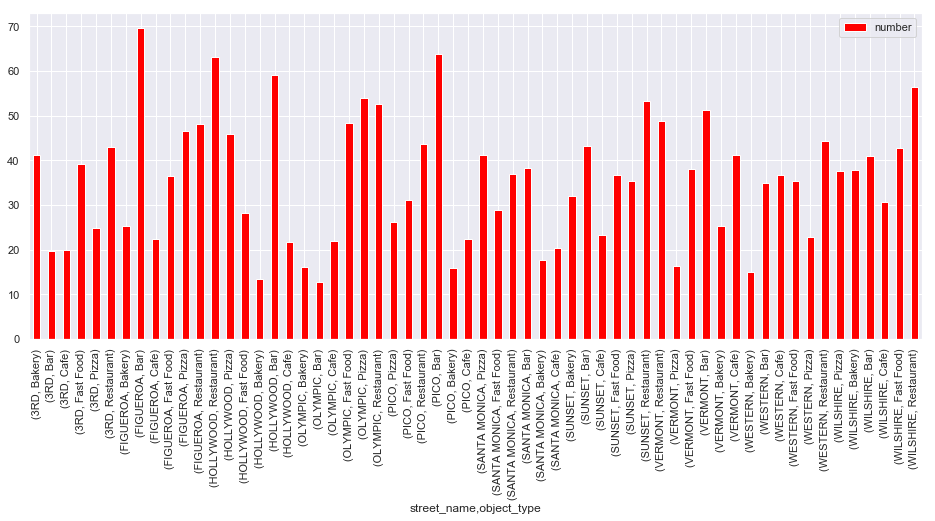

In [467]:
#Mean number of seats per street of the top 10 most popular streets for each type of establishment in each street
df[df['street_name'].isin(top_streets_general)].groupby(['street_name','object_type'])\
                                                        .agg({'number':'mean'})\
.sort_values('street_name').plot(kind='bar',figsize=(16,6),color='red')
plt.show()

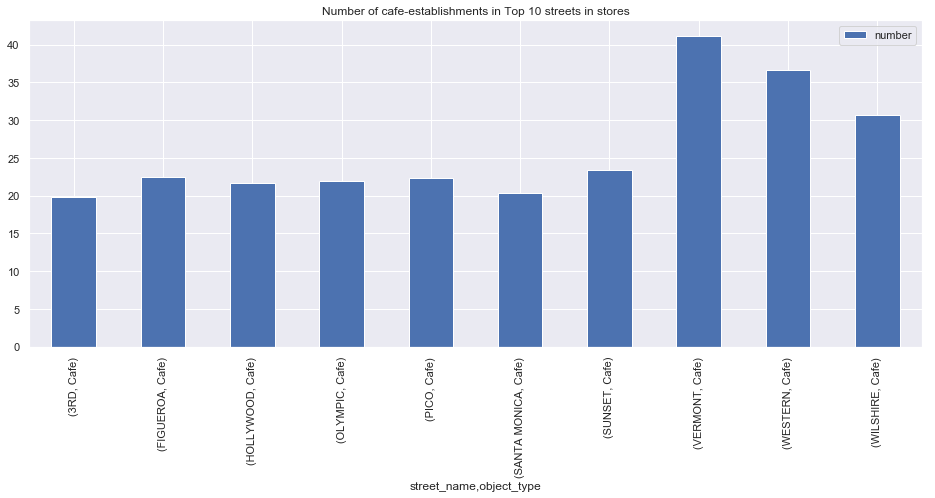

In [468]:
df[(df['street_name'].isin(top_streets_general)) & (df['object_type']=='Cafe')]\
    .groupby(['street_name','object_type'])\
    .agg({'number':'mean'})\
    .sort_values('street_name').plot(kind='bar',figsize=(16,6))
plt.title('Number of cafe-establishments in Top 10 streets in stores')
#plt.savefig(my_path+'/Number_of_cafe-establishments_in_Top_10_streets_in_stores.png',dpi=300,bbox_inches="tight")
plt.show()


* Vermont street which doesn't have any chain cafe has the highest mean number of seats for no-chain cafe.
* Santa monica and 3rd have the lowest mean of seats with the less stores of chain cafes and bars with santa monica having not at all any chain-bar

In [469]:
top20_seat_stores.head()

,chain_name,number_of_stores,seats
0,THE COFFEE BEAN & TEA LEAF,32,26.718750
1,SUBWAY,24,17.000000
2,YOGURTLAND,10,18.600000
3,WINGSTOP,10,26.000000
4,DOMINO'S PIZZA,9,11.111111


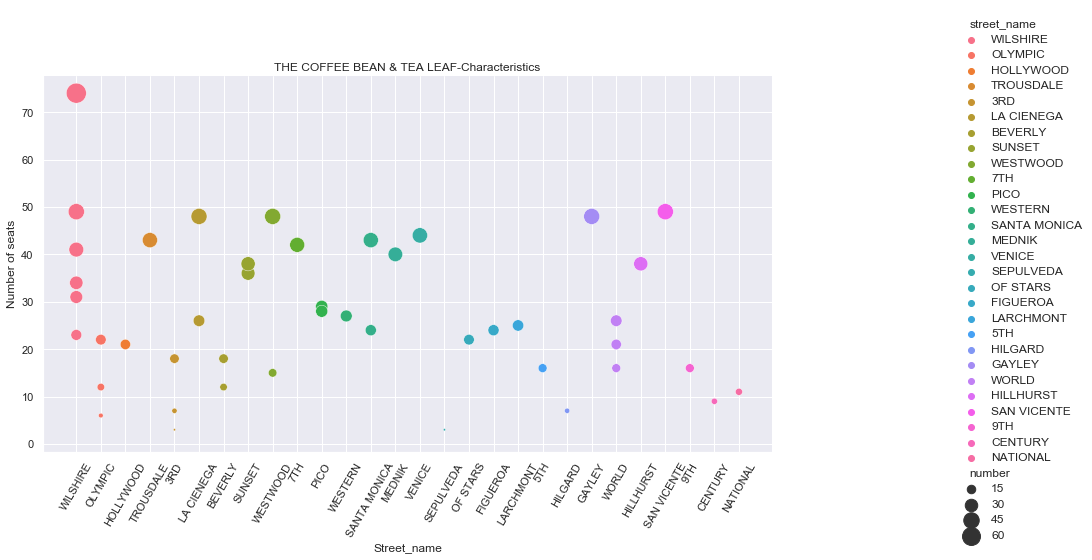

In [470]:
#General pattern for the biggest cafe-chain the THE COFFEE BEAN & TEA LEAF
g=sns.relplot(x='street_name',y='number',hue='street_name',sizes=(0,400),\
              size='number',data=df[df['object_name']=='THE COFFEE BEAN & TEA LEAF'])
g.fig.set_size_inches(16,6)
g.set(xlabel='Street_name',ylabel='Number of seats')
plt.title('THE COFFEE BEAN & TEA LEAF-Characteristics')
plt.xticks(rotation=60)

#plt.savefig(my_path+'/THE_COFFEE_BEAN_&_TEA_LEAF-Characteristics.png',dpi=100,bbox_inches="tight")
plt.show()

In [471]:
df[df['object_name']=='THE COFFEE BEAN & TEA LEAF']['street_name'].unique()

array(['WILSHIRE', 'OLYMPIC', 'HOLLYWOOD', 'TROUSDALE', '3RD',
       'LA CIENEGA', 'BEVERLY', 'SUNSET', 'WESTWOOD', '7TH', 'PICO',
       'WESTERN', 'SANTA MONICA', 'MEDNIK', 'VENICE', 'SEPULVEDA',
       'OF STARS', 'FIGUEROA', 'LARCHMONT', '5TH', 'HILGARD', 'GAYLEY',
       'WORLD', 'HILLHURST', 'SAN VICENTE', '9TH', 'CENTURY', 'NATIONAL'],
      dtype=object)

* The 'THE COFFEE BEAN & TEA LEAF' has only one store in the streets: HOLLYWOOD,TROUSDALE,WESTERN,SEPULVEDA,OF STARS,FIGUEROA,LARCHMONT,5TH,HILGARD,GAYLEY,HILLHURST,SAN VICENTE,9TH,CENTURY and NATIONAL. Which is 15 streets in total with one store out of the 28 streets that can this brand be found.

### Overall conclusion and provide recommendations on a Cafe establishment and number of seats. Comments on the possibility of developing a chain.
<a id="5"><a/>

* WILSHIRE street has the most stores of the biggest chain the  'THE COFFEE BEAN & TEA LEAF', with number of seats ranging 20+ till 75 seats.In only 6 streets this brand has more than one store while in 15 out of 28 streets that can be found has only 1 store.
* Vermont street which doesn't have any chain cafe has the highest mean of seats for no-chain cafe.
* Santa monica and 3rd have the lowest mean of seats with the less stores of chain cafes and bars with santa monica having not at all any chain-bar.
* No-chain cafes tend to have less seats ~20 than chain cafes who have a mean of 25 seats.'THE COFFEE BEAN & TEA LEAF' has a mean number of 26,9 seats.
* Sunset street has the most no-chain cafes and Wilshire has the most chain-cafe. That could mean Wilshire is a more central commercial street.
* We see no at all chain-cafes in Vermont neither chain-bars. The fact that there are many fast food establishments maybe indicates Vermont is a central road with noticable flow of people or the average age of customers could be more young or teenagers.
> Recommendations:
* Depends on the budget of the investment since we are interested in run a robot-cafe chain, may we should look for the Vermont and Santa monica streets, where they don't have many restaurants which may illustrates a younger average of customers age while in Vermont there is not even one chain-cafe. In Santa monica street 'THE COFFEE BEAN & TEA LEAF' has already 2 stores with 25 and 40+ seats. Due to the strategy of our markething we could try to open a small cafe with max 10-14 seats (which is the most frequent number of seats for a cafe) next to or nearby 'THE COFFEE BEAN & TEA LEAF' store at the streets where this brand has only 1 store.
* Additional data like rent cost per sq.m or which streets have the most companies/offices or which streets are nearby a park could help us for further conclusions since people from offices or people they go to the park spend less time to drink a coffee or they just grab a coffee to go,hence a robot cafe fulfils the profile of a cafe for this purposes.